In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
transaction=pd.read_excel('drive/MyDrive/Colab Notebooks/Customer_Purchase_Analysis/QVI_transaction_data.xlsx')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [51]:
transaction.dtypes



DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [52]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [53]:
customer=pd.read_csv('drive/MyDrive/Colab Notebooks/Customer_Purchase_Analysis/QVI_purchase_behaviour.csv')
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [54]:
transaction['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction['DATE'], unit='D')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [55]:
# summary of the PROD_NAME column
transaction['PROD_NAME'].value_counts().sort_index()

Burger Rings 220g                         1564
CCs Nacho Cheese    175g                  1498
CCs Original 175g                         1514
CCs Tasty Cheese    175g                  1539
Cheetos Chs & Bacon Balls 190g            1479
                                          ... 
WW Sour Cream &OnionStacked Chips 160g    1483
WW Supreme Cheese   Corn Chips 200g       1509
Woolworths Cheese   Rings 190g            1516
Woolworths Medium   Salsa 300g            1430
Woolworths Mild     Salsa 300g            1491
Name: PROD_NAME, Length: 114, dtype: int64

In [56]:
# summary of the PROD_NAME column
transaction.groupby('PROD_NAME').size()


PROD_NAME
Burger Rings 220g                         1564
CCs Nacho Cheese    175g                  1498
CCs Original 175g                         1514
CCs Tasty Cheese    175g                  1539
Cheetos Chs & Bacon Balls 190g            1479
                                          ... 
WW Sour Cream &OnionStacked Chips 160g    1483
WW Supreme Cheese   Corn Chips 200g       1509
Woolworths Cheese   Rings 190g            1516
Woolworths Medium   Salsa 300g            1430
Woolworths Mild     Salsa 300g            1491
Length: 114, dtype: int64

In [57]:
productWords = transaction['PROD_NAME'].str.split(expand=True).stack().reset_index(level=0, drop=True).to_frame('words')
productWords.reset_index(drop=True, inplace=True)
## removing digits and special charachters
relevant_productWords=productWords[~productWords['words'].str.contains(r'[^a-zA-Z]')]
## sort the distinct word by frequency of occurence
relevant_productWords['words'].value_counts().sort_values(ascending=False)

Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Name: words, Length: 168, dtype: int64

In [58]:
# as we need only chips (chips name in any form i.e 'chp','chip' or ' chip'). we remove other products
transactionData=transaction.copy()
transactionData['CHIPS']=transactionData['PROD_NAME'].str.lower().str.contains('chp' or 'chip' or ' chp')
transactionData=transactionData[transactionData['CHIPS']==True].drop('CHIPS',axis=1)
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
58,2018-08-19,75,75186,74168,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20
67,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.50
...,...,...,...,...,...,...,...,...
264584,2018-08-24,261,261292,260939,4,Dorito Corn Chp Supreme 380g,2,13.00
264585,2018-10-10,261,261292,260940,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20
264597,2018-10-21,261,261375,261296,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.20
264807,2019-01-19,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.00


In [59]:
# checking if there is any null record in any column
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [60]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,12765.000000,1.276500e+04,12765.000000,12765.000000,12765.000000,12765.000000
mean,135.919702,1.366926e+05,136019.253897,45.852096,1.947748,9.774477
std,77.439308,8.491404e+04,78716.212504,42.642471,2.500582,8.332081
min,1.000000,1.071000e+03,82.000000,4.000000,1.000000,3.250000
25%,69.000000,6.912700e+04,66648.000000,9.000000,2.000000,9.200000
50%,134.000000,1.343130e+05,138152.000000,60.000000,2.000000,9.200000
75%,204.000000,2.050350e+05,204086.000000,108.000000,2.000000,9.200000
max,272.000000,2.370751e+06,270196.000000,108.000000,200.000000,650.000000


In [61]:
# we have an outlier that a customer purchases 200 packets of chips. getting the customer details (loyalty card no.)
prod_qty_200=transactionData[transactionData['PROD_QTY']==200]
prod_qty_200

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [62]:
# checking if that customer had any other transaction using his loyalty card no.
lylty_card_nbr_226000=transactionData[transactionData['LYLTY_CARD_NBR']==226000]
lylty_card_nbr_226000

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [63]:
# since the customer didn't made any other transaction. It looks like he buy chips for commercial purpose.
# we'll remove this loyalty card no. for further analysis
transactionData=transactionData[transactionData['LYLTY_CARD_NBR']!=226000]
print(transactionData[transactionData['LYLTY_CARD_NBR']==226000])

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [64]:
# number of transaction by date in the sequence
transactions_by_day = transactionData.groupby('DATE').size().reset_index(name='N')
transactions_by_day

,DATE,N
0,2018-07-01,31
1,2018-07-02,30
2,2018-07-03,29
3,2018-07-04,43
4,2018-07-05,30
...,...,...
359,2019-06-26,31
360,2019-06-27,26
361,2019-06-28,38
362,2019-06-29,35


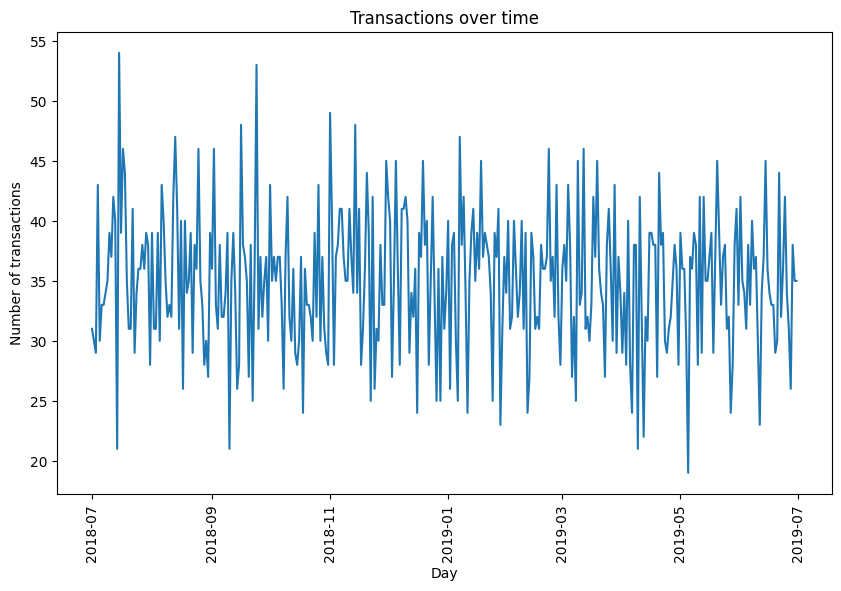

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='N', data=transactions_by_day)
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

In [66]:
import plotly.express as px
fig = px.line(transactions_by_day, x='DATE', y='N', labels={'N': 'Number of transactions'},
              title='Transactions over time')

fig.update_layout(
    xaxis_title='Day',
    yaxis_title='Number of transactions',
    xaxis=dict(tickangle=90)
)

# Show the plot
fig.show()

In [67]:
# creating average price per unit column as we need it later for analysis purpose
transactionData['AVG_PRICE_PER_UNIT']=transactionData['TOT_SALES']/transactionData['PROD_QTY']
transactionData

<ipython-input-67-4add67eb9628>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,AVG_PRICE_PER_UNIT
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,4.60
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,3.25
58,2018-08-19,75,75186,74168,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60
67,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.50,3.25
...,...,...,...,...,...,...,...,...,...
264584,2018-08-24,261,261292,260939,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50
264585,2018-10-10,261,261292,260940,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,4.60
264597,2018-10-21,261,261375,261296,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.20,4.60
264807,2019-01-19,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50


In [68]:
# Creating pack size
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)').astype(float)
transactionData

<ipython-input-68-2b4f1ee318cb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,AVG_PRICE_PER_UNIT,PACK_SIZE
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,4.60,150.0
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,3.25,380.0
58,2018-08-19,75,75186,74168,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0
67,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.50,3.25,380.0
...,...,...,...,...,...,...,...,...,...,...
264584,2018-08-24,261,261292,260939,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0
264585,2018-10-10,261,261292,260940,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,4.60,150.0
264597,2018-10-21,261,261375,261296,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.20,4.60,150.0
264807,2019-01-19,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0


In [69]:
# Creating Brand names
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str.get(0)
transactionData

<ipython-input-69-e8b6acc47d37>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,AVG_PRICE_PER_UNIT,PACK_SIZE,BRAND
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,4.60,150.0,Kettle
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0,Kettle
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,3.25,380.0,Dorito
58,2018-08-19,75,75186,74168,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0,Kettle
67,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.50,3.25,380.0,Dorito
...,...,...,...,...,...,...,...,...,...,...,...
264584,2018-08-24,261,261292,260939,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0,Dorito
264585,2018-10-10,261,261292,260940,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,4.60,150.0,Kettle
264597,2018-10-21,261,261375,261296,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.20,4.60,150.0,Kettle
264807,2019-01-19,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0,Dorito


In [70]:
# summary of customer data
print(customer.dtypes)
customer.describe()

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [71]:
## distribution of key columns
import plotly.graph_objects as go

# distribution of lifestage
lifestage_counts=customer['LIFESTAGE'].value_counts()
dis_of_lifestage=go.Figure(go.Bar(x=lifestage_counts.index,y=lifestage_counts.values,marker_color='#1f77b4'))
dis_of_lifestage.update_layout(title='Distribution of Lifestage',xaxis=dict(tickangle=45),showlegend=False)
dis_of_lifestage.show()

# distribution of premium customers
premium_counts=customer['PREMIUM_CUSTOMER'].value_counts()
dis_of_prem_cust=go.Figure(go.Bar(x=premium_counts.index,y=premium_counts.values,marker_color='#ff7f0e'))
dis_of_prem_cust.update_layout(title='Distribution of Premium Customers',showlegend=False)
dis_of_prem_cust.show()

In [72]:
# Merge transaction data to customer data
data = pd.merge(transactionData, customer, how='left', on='LYLTY_CARD_NBR')
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,AVG_PRICE_PER_UNIT,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,4.60,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
1,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,3.25,380.0,Dorito,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,75,75186,74168,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,4.60,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.50,3.25,380.0,Dorito,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12758,2018-08-24,261,261292,260939,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0,Dorito,YOUNG SINGLES/COUPLES,Premium
12759,2018-10-10,261,261292,260940,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,4.60,150.0,Kettle,YOUNG SINGLES/COUPLES,Premium
12760,2018-10-21,261,261375,261296,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.20,4.60,150.0,Kettle,YOUNG SINGLES/COUPLES,Premium
12761,2019-01-19,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.00,6.50,380.0,Dorito,YOUNG SINGLES/COUPLES,Premium


In [73]:
data.isnull().sum()

DATE                  0
STORE_NBR             0
LYLTY_CARD_NBR        0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY              0
TOT_SALES             0
AVG_PRICE_PER_UNIT    0
PACK_SIZE             0
BRAND                 0
LIFESTAGE             0
PREMIUM_CUSTOMER      0
dtype: int64

In [74]:
## Data analysis on customer segments
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,2252.50
1,MIDAGE SINGLES/COUPLES,Mainstream,6028.35
2,MIDAGE SINGLES/COUPLES,Premium,3581.25
3,NEW FAMILIES,Budget,1445.65
4,NEW FAMILIES,Mainstream,1333.30
5,NEW FAMILIES,Premium,632.80
6,OLDER FAMILIES,Budget,9949.65
7,OLDER FAMILIES,Mainstream,6411.25
8,OLDER FAMILIES,Premium,4594.90
9,OLDER SINGLES/COUPLES,Budget,8967.30


In [75]:
sales_by_LnP=px.bar(sales_by_segment,x='LIFESTAGE',y='TOT_SALES',color='PREMIUM_CUSTOMER',text=round(sales_by_segment['TOT_SALES'],5),
                    title='Sales by Lifestage and Premium Customer',
                    labels={'TOT_SALES':'Total_Sales','LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium Customer'})
sales_by_LnP.show()

In [76]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,204
1,MIDAGE SINGLES/COUPLES,Mainstream,569
2,MIDAGE SINGLES/COUPLES,Premium,346
3,NEW FAMILIES,Budget,139
4,NEW FAMILIES,Mainstream,130
5,NEW FAMILIES,Premium,65
6,OLDER FAMILIES,Budget,896
7,OLDER FAMILIES,Mainstream,567
8,OLDER FAMILIES,Premium,406
9,OLDER SINGLES/COUPLES,Budget,831


In [77]:
cust_by_LnP=px.bar(customers_by_segment,x='LIFESTAGE',y='LYLTY_CARD_NBR',color='PREMIUM_CUSTOMER',text=round(customers_by_segment['LYLTY_CARD_NBR'],5),
                    title='Customers by Lifestage and Premium Customer',
                    labels={'LYLTY_CARD_NBR':'Customers','LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium Customer'})
cust_by_LnP.show()

In [78]:
# number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
units_per_customer

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1.947598
1,MIDAGE SINGLES/COUPLES,Mainstream,1.922099
2,MIDAGE SINGLES/COUPLES,Premium,1.887399
3,NEW FAMILIES,Budget,1.887417
4,NEW FAMILIES,Mainstream,1.942029
5,NEW FAMILIES,Premium,1.852941
6,OLDER FAMILIES,Budget,1.960199
7,OLDER FAMILIES,Mainstream,1.976672
8,OLDER FAMILIES,Premium,1.946121
9,OLDER SINGLES/COUPLES,Budget,1.920344


In [79]:
units_per_cust_by_LnP=px.bar(units_per_customer,x='LIFESTAGE',y='PROD_QTY',color='PREMIUM_CUSTOMER',text=round(units_per_customer['PROD_QTY'],5),
                    title='Units per customer by Lifestage and Premium Customer',
                    labels={'PROD_QTY':'Units Per Customer','LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium Customer'})
units_per_cust_by_LnP.show()

In [80]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_PRICE_PER_UNIT'].mean().reset_index()
avg_price_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
0,MIDAGE SINGLES/COUPLES,Budget,5.041048
1,MIDAGE SINGLES/COUPLES,Mainstream,4.985851
2,MIDAGE SINGLES/COUPLES,Premium,5.076005
3,NEW FAMILIES,Budget,5.051325
4,NEW FAMILIES,Mainstream,5.011232
5,NEW FAMILIES,Premium,5.019118
6,OLDER FAMILIES,Budget,5.046219
7,OLDER FAMILIES,Mainstream,5.048367
8,OLDER FAMILIES,Premium,5.082651
9,OLDER SINGLES/COUPLES,Budget,5.017277


In [81]:
avg_price_per_unit_by_LnP=px.bar(avg_price_per_unit,x='LIFESTAGE',y='AVG_PRICE_PER_UNIT',color='PREMIUM_CUSTOMER',text=round(avg_price_per_unit['AVG_PRICE_PER_UNIT'],5),
                    title='Avg price per unit by Lifestage and Premium Customer',
                    labels={'AVG_PRICE_PER_UNIT':'Avg Price Per Unit','LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium Customer'})
avg_price_per_unit_by_LnP.show()

In [82]:
# Save dataset as a CSV
data.to_csv("drive/MyDrive/Colab Notebooks/Customer_Purchase_Analysis/QVI_data.csv", index=False, mode='w')

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
